In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1.a  Load in the image data matrix (with rows as images and columns as features). Also load in the numeric class labels from the segmentation class file. Using your favorite method (e.g., sklearn's min-max scaler), perform min-max normalization on the data matrix so that each feature is scaled to [0,1] range.

In [138]:
data = pd.read_table('data/segmentation_data/segmentation_data.txt',na_values=['?'],delimiter=",",header=None)
classes = pd.read_table('data/segmentation_data/segmentation_classes.txt',na_values=['?'],header=None)
names = pd.read_table('data/segmentation_data/segmentation_names.txt',na_values=['?'],header=None)

In [139]:
print("Data Shape ",data.shape)
print("Data - head\n",data.head())

## data is already in image x features format)

Data Shape  (2100, 19)
Data - head
       0      1   2    3    4    5    6    7    8     9     10    11    12  \
0 110.00 189.00   9 0.00 0.00 1.00 0.67 1.22 1.19 12.93 10.89  9.22 18.67   
1  86.00 187.00   9 0.00 0.00 1.11 0.72 1.44 0.75 13.74 11.67 10.33 19.22   
2 225.00 244.00   9 0.00 0.00 3.39 2.20 3.00 1.52 12.26 10.33  9.33 17.11   
3  47.00 232.00   9 0.00 0.00 1.28 1.25 1.00 0.89 12.70 11.00  9.00 18.11   
4  97.00 186.00   9 0.00 0.00 1.17 0.69 1.17 1.01 15.59 13.89 11.78 21.11   

     13     14    15    16   17   18  
0 -6.11 -11.11 17.22 18.67 0.51 1.91  
1 -6.22 -10.22 16.44 19.22 0.46 1.94  
2 -5.78  -8.78 14.56 17.11 0.48 1.99  
3 -5.11 -11.11 16.22 18.11 0.50 1.88  
4 -5.11 -11.44 16.56 21.11 0.44 1.86  


In [140]:
print("classes Shape ",classes.shape)
print("classes - head\n",classes.head())


classes Shape  (2100, 2)
classes - head
        0  1
0  GRASS  0
1  GRASS  0
2  GRASS  0
3  GRASS  0
4  GRASS  0


In [141]:
print("names Shape ",names.shape)
print("names\n",names.head())


names Shape  (19, 1)
names
                       0
0   REGION-CENTROID-COL
1   REGION-CENTROID-ROW
2    REGION-PIXEL-COUNT
3  SHORT-LINE-DENSITY-5
4  SHORT-LINE-DENSITY-2


In [142]:
## apply sklearn min-max

from sklearn.preprocessing import MinMaxScaler

In [143]:
scaler = MinMaxScaler()

In [144]:
scaled_data = scaler.fit_transform(data)

In [145]:
scaled_data

array([[0.43, 0.74, 0.  , ..., 0.12, 0.51, 0.83],
       [0.34, 0.73, 0.  , ..., 0.13, 0.46, 0.84],
       [0.89, 0.97, 0.  , ..., 0.11, 0.48, 0.84],
       ...,
       [0.5 , 0.62, 0.  , ..., 0.07, 0.54, 0.18],
       [0.59, 0.61, 0.  , ..., 0.08, 0.5 , 0.18],
       [0.49, 0.63, 0.  , ..., 0.1 , 0.48, 0.17]])

## 1.b Using the Kmeans implementation in scikit-learn, perform clustering on the image data (use K = 7 in your clustering so that later we can compare the clusters to the 7 pre-assigned image classes). Print the cluster centroids (use some formatting so that they are visually understandable). To evaluate your clusters, first perform Silhouette analysis on the clusters (compute Silhouette values for all instances in the data, and then compute the overall mean Silhouette value; optionally, you can provide a visaulization of the Silhouettes). Next, compare your 7 clusters to the 7 pre-assigned classes by computing the Completeness and Homogeneity values of the generated clusters.

In [146]:
from sklearn.cluster import KMeans

In [147]:
K = 7;
kmean = KMeans(n_clusters=K);

In [148]:
kmean.fit(scaled_data)

KMeans(n_clusters=7)

In [149]:
clusters = kmean.predict(scaled_data)

In [150]:
clust_df = pd.DataFrame(clusters, columns=["Cluster"])

In [151]:
clust_df

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
2095,5
2096,3
2097,4
2098,4


### Print the cluster centroids

In [152]:
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(kmean.cluster_centers_, columns=names)
centroids

,"(REGION-CENTROID-COL,)","(REGION-CENTROID-ROW,)","(REGION-PIXEL-COUNT,)","(SHORT-LINE-DENSITY-5,)","(SHORT-LINE-DENSITY-2,)","(VEDGE-MEAN,)","(VEDGE-SD,)","(HEDGE-MEAN,)","(HEDGE-SD,)","(INTENSITY-MEAN,)","(RAWRED-MEAN,)","(RAWBLUE-MEAN,)","(RAWGREEN-MEAN,)","(EXRED-MEAN,)","(EXBLUE-MEAN,)","(EXGREEN-MEAN,)","(VALUE-MEAN,)","(SATURATION-MEAN,)","(HUE-MEAN,)"
0,0.51,0.81,0.00,0.08,0.01,0.05,0.00,0.05,0.00,0.11,0.09,0.09,0.14,0.68,0.08,0.82,0.13,0.41,0.89
1,0.75,0.53,0.00,0.04,0.04,0.11,0.02,0.11,0.02,0.30,0.28,0.35,0.27,0.59,0.45,0.31,0.35,0.30,0.16
2,0.54,0.15,0.00,0.03,0.00,0.03,0.00,0.03,0.00,0.82,0.78,0.89,0.79,0.27,0.67,0.29,0.89,0.21,0.13
3,0.26,0.39,0.00,0.07,0.02,0.08,0.00,0.06,0.00,0.15,0.14,0.19,0.12,0.72,0.34,0.36,0.19,0.41,0.20
4,0.77,0.43,0.00,0.01,0.02,0.04,0.00,0.02,0.00,0.04,0.04,0.06,0.03,0.78,0.22,0.49,0.06,0.54,0.24
5,0.25,0.46,0.00,0.03,0.01,0.04,0.00,0.03,0.00,0.03,0.02,0.04,0.02,0.77,0.22,0.51,0.04,0.80,0.18
6,0.30,0.53,0.00,0.05,0.05,0.10,0.01,0.08,0.01,0.40,0.37,0.47,0.35,0.50,0.57,0.21,0.47,0.30,0.16


### To evaluate your clusters, first perform Silhouette analysis on the clusters (compute Silhouette values for all instances in the data, and then compute the overall mean Silhouette value; optionally, you can provide a visaulization of the Silhouettes)

In [153]:
from sklearn.metrics import *

In [154]:
silhouettes = silhouette_samples(scaled_data,clusters)

In [155]:
print(silhouettes[:20])

[0.57 0.56 0.47 0.5  0.57 0.56 0.54 0.41 0.52 0.47 0.49 0.49 0.58 0.56
 0.38 0.53 0.55 0.42 0.42 0.4 ]


In [156]:
## silhouettes mean
sl_mean = silhouettes.mean()
print(" silhouettes.mean : ",sl_mean)

 silhouettes.mean :  0.332066475286672


In [157]:
## plot the silhouette
import pylab as pl

def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

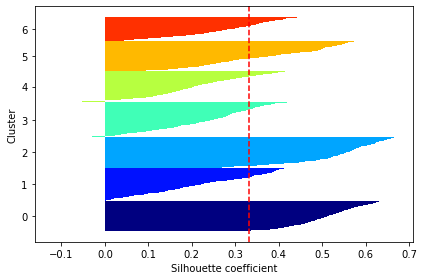

In [158]:
plot_silhouettes(scaled_data,clusters)

In [159]:
from sklearn.metrics import completeness_score, homogeneity_score

### Next, compare your 7 clusters to the 7 pre-assigned classes by computing the Completeness and Homogeneity values of the generated clusters

In [160]:
classes_arr = np.array(classes[1])
print(" classes_arr : ",classes_arr)
print(" clusters    : ",clusters)

 classes_arr :  [0 0 0 ... 3 3 3]
 clusters    :  [0 0 0 ... 4 4 3]


In [161]:
print("completeness_score : ",completeness_score(classes_arr,clusters))
print("homogeneity_score : ",homogeneity_score(classes_arr,clusters))

completeness_score :  0.6131870124853009
homogeneity_score :  0.6115021163370862


## 1.c Perform PCA on the normalized image data matrix. You may use the linear algebra package in Numpy or the Decomposition module in scikit-learn (the latter is much more efficient). Analyze the principal components to determine the number, r, of PCs needed to capture at least 95% of variance in the data. Provide a plot of PC variances. Then use these r components as features to transform the data into a reduced dimension space.

In [162]:
from sklearn import decomposition

In [163]:
pca = decomposition.PCA(n_components=5)

In [164]:
np.set_printoptions(precision=2,suppress=True)
transformed_data = pca.fit_transform(scaled_data)
print("transformed_data\n",transformed_data)

transformed_data
 [[-0.69  0.53  0.25 -0.2  -0.08]
 [-0.67  0.51  0.34 -0.17 -0.04]
 [-0.71  0.77 -0.16 -0.01 -0.17]
 ...
 [-0.51 -0.13 -0.08  0.1  -0.03]
 [-0.48 -0.09 -0.16  0.11  0.  ]
 [-0.44 -0.11 -0.05  0.15  0.02]]


In [165]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)
print(" explained_variance_ratio - sum ",sum(explained_variance_ratio))

[0.61 0.13 0.1  0.05 0.04]
 explained_variance_ratio - sum  0.9212588648109566


In [166]:
def getPCAData(D,k):
    r = 0
    pca_data = []
    for i in range(k):
        pca = decomposition.PCA(n_components=i)
        transformed_data = pca.fit_transform(D)
        #print("transformed_data\n",transformed_data)
        explained_variance_ratio = pca.explained_variance_ratio_
        sum_of_ratio = sum(explained_variance_ratio)
        #print(" 1. sum_of_ratio : ",sum_of_ratio)
        
        ## number, r, of PCs needed to capture at least 95% of variance in the data
        if(sum(explained_variance_ratio) >= 0.95):
            #print(" 2. sum_of_ratio : ",sum_of_ratio, " r=",i)
            r = i
            pca_data = transformed_data;
            break;
    return r, pca_data
        
    

In [167]:
r, pca_data = getPCAData(scaled_data,names.shape[0])

In [168]:
print(" the number of PCA components needed for atleat 95% variance is ",r)

pca_data_df = pd.DataFrame(pca_data,columns=names[0:r])
print(" transformed data set \n", pca_data_df)


 the number of PCA components needed for atleat 95% variance is  7
 transformed data set 
       (REGION-CENTROID-COL,)  (REGION-CENTROID-ROW,)  (REGION-PIXEL-COUNT,)  \
0                      -0.69                    0.53                   0.25   
1                      -0.67                    0.51                   0.34   
2                      -0.71                    0.77                  -0.16   
3                      -0.73                    0.51                   0.50   
4                      -0.64                    0.53                   0.30   
...                      ...                     ...                    ...   
2095                   -0.50                   -0.26                   0.27   
2096                   -0.50                   -0.26                   0.38   
2097                   -0.51                   -0.13                  -0.08   
2098                   -0.48                   -0.09                  -0.16   
2099                   -0.44            

### plotting the variance and reduced dimension space

In [169]:
np.set_printoptions(precision=2,suppress=True)

pca = decomposition.PCA(n_components=r)
transformed_data = pca.fit_transform(pca_data)
print("transformed_data\n",transformed_data)
explained_variance_ratio = pca.explained_variance_ratio_
print("\n explained_variance_ratio ",explained_variance_ratio)

transformed_data
 [[-0.69  0.53  0.25 ... -0.08  0.05 -0.05]
 [-0.67  0.51  0.34 ... -0.04  0.06 -0.04]
 [-0.71  0.77 -0.16 ... -0.17  0.04 -0.06]
 ...
 [-0.51 -0.13 -0.08 ... -0.03 -0.03 -0.11]
 [-0.48 -0.09 -0.16 ...  0.   -0.   -0.09]
 [-0.44 -0.11 -0.05 ...  0.02 -0.21  0.15]]

 explained_variance_ratio  [0.63 0.14 0.11 0.05 0.04 0.02 0.02]


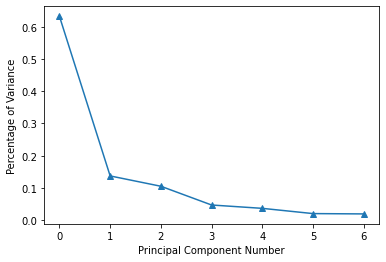

In [170]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(0, r), explained_variance_ratio  , marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

## 1d Perform Kmeans again, but this time on the lower dimensional transformed data. Then compare Silhouette values as well as completeness and Homogeneity values of the new clusters. Compare these results with those obtained on the full data in part b.

In [171]:
K =7
kmean = KMeans(n_clusters=K);
kmean.fit(pca_data)
clusters_reduced_dim = kmean.predict(pca_data)
centroids_reduced_dim = pd.DataFrame(kmean.cluster_centers_, columns=names[0:r])

print(" clusters_reduced_dim ",clusters_reduced_dim)
print(" centroids_reduced_dim ",centroids_reduced_dim)


 clusters_reduced_dim  [2 2 2 ... 4 4 5]
 centroids_reduced_dim     (REGION-CENTROID-COL,)  (REGION-CENTROID-ROW,)  (REGION-PIXEL-COUNT,)  \
0                   -0.60                   -0.36                   0.11   
1                    1.41                    0.09                   0.04   
2                   -0.62                    0.64                   0.20   
3                    0.18                    0.04                  -0.26   
4                   -0.51                   -0.06                  -0.34   
5                   -0.21                   -0.25                   0.15   
6                    0.44                   -0.11                   0.17   

   (SHORT-LINE-DENSITY-5,)  (SHORT-LINE-DENSITY-2,)  (VEDGE-MEAN,)  \
0                    -0.13                    -0.13          -0.02   
1                    -0.17                    -0.03          -0.01   
2                    -0.09                    -0.07           0.01   
3                     0.18                    

 silhouettes_reduced_dim  [0.59 0.57 0.48 0.51 0.59]


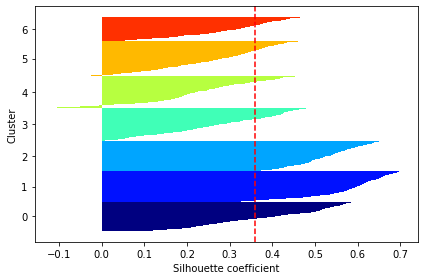

In [183]:
silhouettes_reduced_dim = silhouette_samples(pca_data,clusters_reduced_dim)
print(" silhouettes_reduced_dim ",silhouettes_reduced_dim[:5])

plot_silhouettes(pca_data,clusters_reduced_dim)   
    

In [184]:
print("reduced dim - completeness_score : ",completeness_score(classes_arr,clusters_reduced_dim))
print("reduced dim - homogeneity_score : ",homogeneity_score(classes_arr,clusters_reduced_dim))

reduced dim - completeness_score :  0.6115749269916771
reduced dim - homogeneity_score :  0.6099736092174177


## comparing result with partb


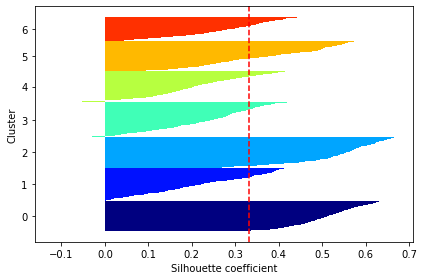

full dim - completeness_score :  0.6131870124853009
full dim - homogeneity_score :  0.6115021163370862


In [180]:
## output with full dimension
plot_silhouettes(scaled_data,clusters)
print("full dim - completeness_score : ",completeness_score(classes_arr,clusters))
print("full dim - homogeneity_score : ",homogeneity_score(classes_arr,clusters))

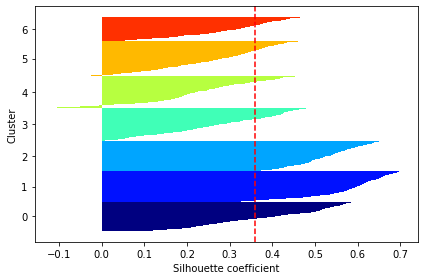

full dim - completeness_score :  0.6115749269916771
full dim - homogeneity_score :  0.6099736092174177


In [186]:
## output with reduced dimension
plot_silhouettes(pca_data,clusters_reduced_dim)
print("full dim - completeness_score : ",completeness_score(classes_arr,clusters_reduced_dim))
print("full dim - homogeneity_score : ",homogeneity_score(classes_arr,clusters_reduced_dim))

### As we can see from above, the completeness stayed almost the same but the homgeneity score is slightly better with full dimension compared to the reduced dimension data set.

### The completeness score approaches 1 when most of the data points that are members of a given class are elements of the same cluster while the homogeneity score approaches 1 when all the clusters contain almost only data points that are member of a single class.

### So from above we can see that each cluster  hold a mix of data (data from different classes)